# Plots without High-K

**To-do List for Figures**
- Make gif of potential gradients with all nitride changing as the applied voltage changes
    - Field plate
    - T gate
- Benchmark IV performance out to larger value (+4V) and compare on a chart
- Benchmark peak field and compare on a chart
- Show channel plot for both field plate and T gate to illustrate when and where the peak field location changes

## Definitions

In [46]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white') # One of the two of these styles will work. not sure why it changes.
#plt.style.use('seaborn-darkgrid')
print(plt.style.available)
import numpy as np

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [47]:
def plotFromFlooxs(IVFile, peakFile):
    
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Gate = IVFile[:,0]
    I = IVFile[:,1]

    plt.figure(figsize=[14,7]);
    plt.subplot(1,2,1)
    plt.plot(Gate, I);
    plt.title("IV")
    plt.xlabel("$V_{G} (V)$");
    plt.ylabel("$I_{DS}$ (${mA}/{cm}$)");
    plt.grid(True);

    # =============================================
    #                 Peak Field
    # =============================================
    
    peakFile = np.loadtxt(peakFile, delimiter=',')    
    Vds = peakFile[:,0]
    peakField = peakFile[:,1]

    plt.subplot(1,2,2);
    plt.plot(Vds, peakField);
    plt.title("GaN Peak Field")
    plt.xlabel("$V_{DS} (V)$");
    plt.ylabel("Electric Field (V/cm)");
    plt.grid(True);

    return Gate, I, Vds, peakField

def flooxsRead(IVFile):
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Vds = IVFile[:,0]
    I = IVFile[:,1]
    return Vds,I

The second plot below is an expanded look at the fieldplate IV characteristics, with $V_g$ going to 4V

## April 10
Vds/Id curves at varying Vds. Tuned schottky barrier height individually for the values 

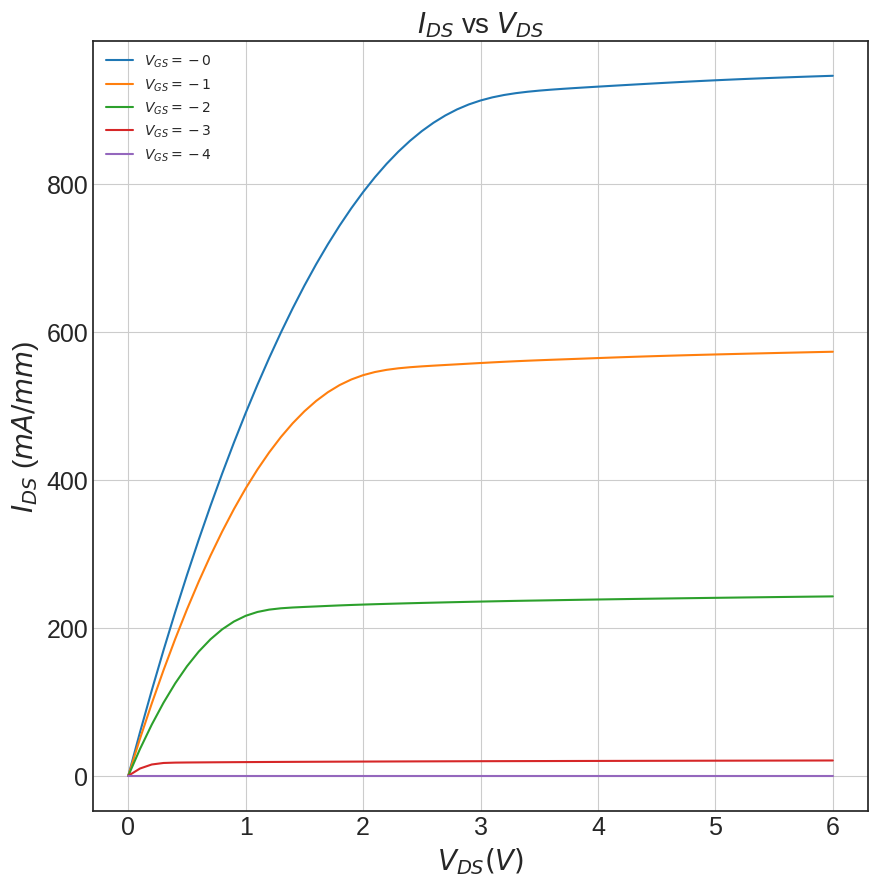

In [48]:

tgate_Vds_0, tgate_Ids_0 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV0")
tgate_Vds_1, tgate_Ids_1 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV1")
tgate_Vds_2, tgate_Ids_2 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV2")
tgate_Vds_3, tgate_Ids_3 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV3")
tgate_Vds_4, tgate_Ids_4 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV4")

plt.figure(figsize=[10,10]);
plt.plot(tgate_Vds_0, tgate_Ids_0, label="$V_{GS}=-0$");
plt.plot(tgate_Vds_1, tgate_Ids_1, label="$V_{GS}=-1$");
plt.plot(tgate_Vds_2, tgate_Ids_2, label="$V_{GS}=-2$");
plt.plot(tgate_Vds_3, tgate_Ids_3, label="$V_{GS}=-3$");
plt.plot(tgate_Vds_4, tgate_Ids_4, label="$V_{GS}=-4$");
plt.title("$I_{DS}$ vs $V_{DS}$", fontsize=20);
plt.xlabel("$V_{DS} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("IV.png", dpi=300, bbox_inches='tight')
plt.show()

**T Gate**

## Gate voltage

**Field plate**

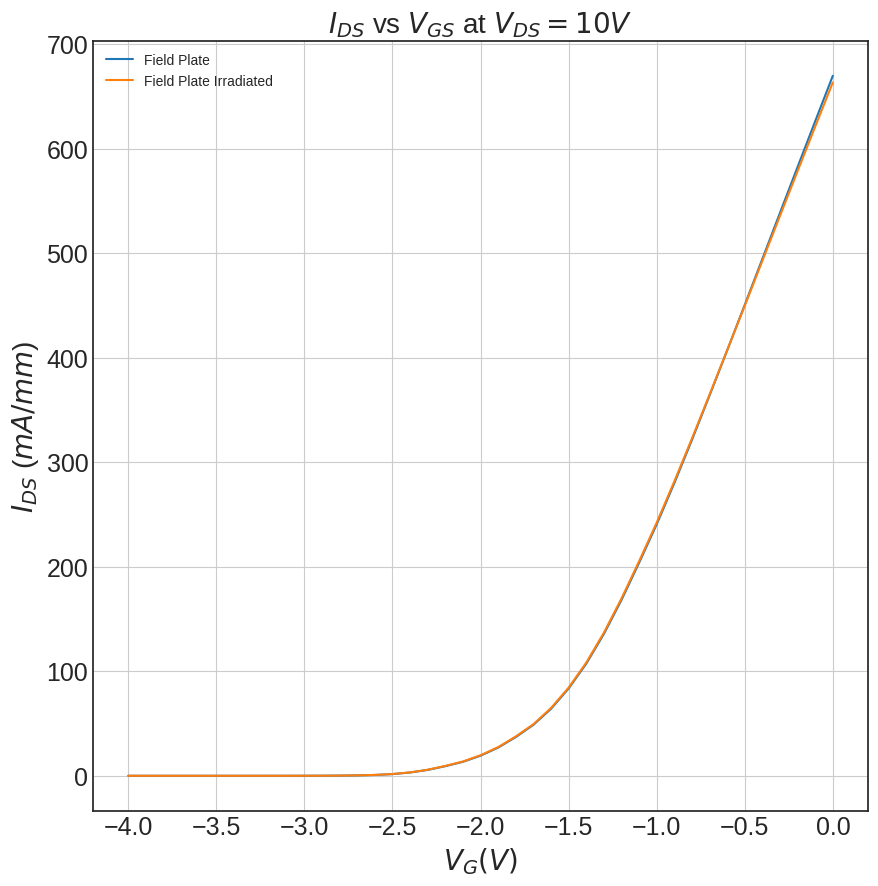

In [49]:
fieldplate_Vgs, fieldplate_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/fieldplate_Vt.csv")
fieldplate_rad_Vgs, fieldplate_rad_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/fieldplate_rad_Vt.csv")
plt.figure(figsize=[10,10]);
plt.plot(fieldplate_Vgs, 1000*fieldplate_Ids, label="Field Plate");
plt.plot(fieldplate_rad_Vgs, 1000*fieldplate_rad_Ids, label="Field Plate Irradiated");
plt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=10V$", fontsize=20);
plt.xlabel("$V_{G} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()

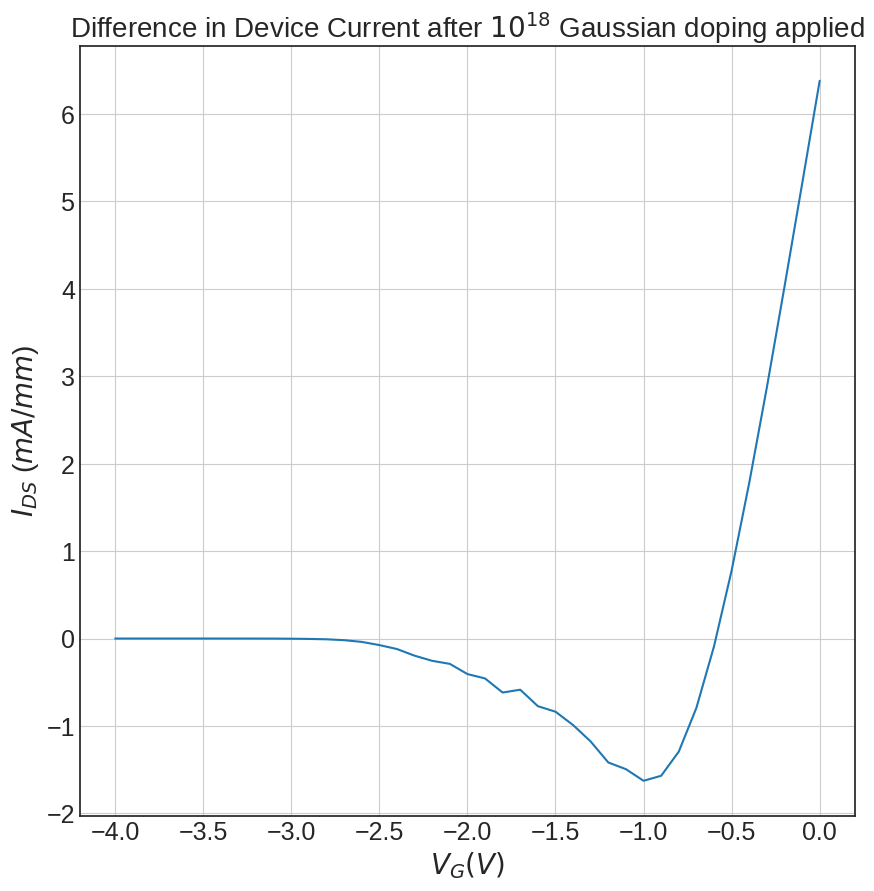

In [50]:
plt.figure(figsize=[10,10]);
plt.plot(fieldplate_Vgs, 1000*(fieldplate_Ids-fieldplate_rad_Ids), label="Field Plate");
plt.title("Difference in Device Current after $10^{18}$ Gaussian doping applied", fontsize=20);
plt.xlabel("$V_{G} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
#plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()

**Modified Field plate struct with gate oxide**

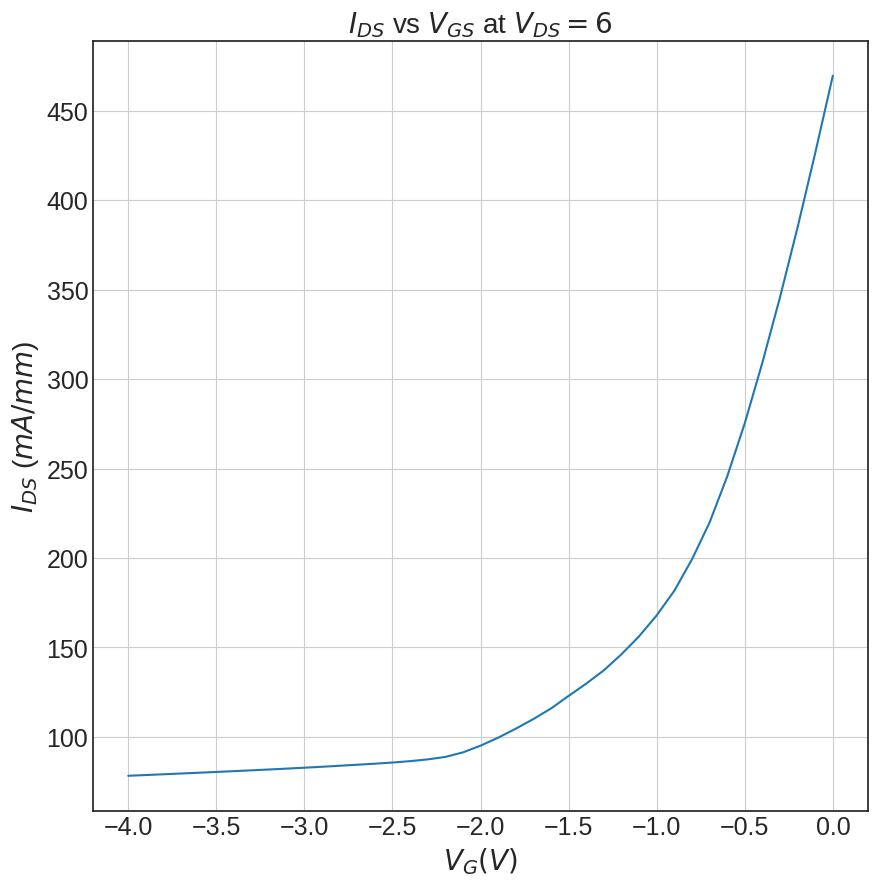

In [51]:
fieldplate_ox_Vgs, fieldplate_ox_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/fieldplate_ox_Vt.csv")
plt.figure(figsize=[10,10]);
plt.plot(fieldplate_ox_Vgs, 1000*fieldplate_ox_Ids, label="Field Plate with Oxide");
plt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=6$", fontsize=20);
plt.xlabel("$V_{G} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
#plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()


## Experimental Data
Uses REF and RF2 from the data provided by Dr. Anderson. The plot immediately below this shows the Vg-Ids curves imposed on the same graph.

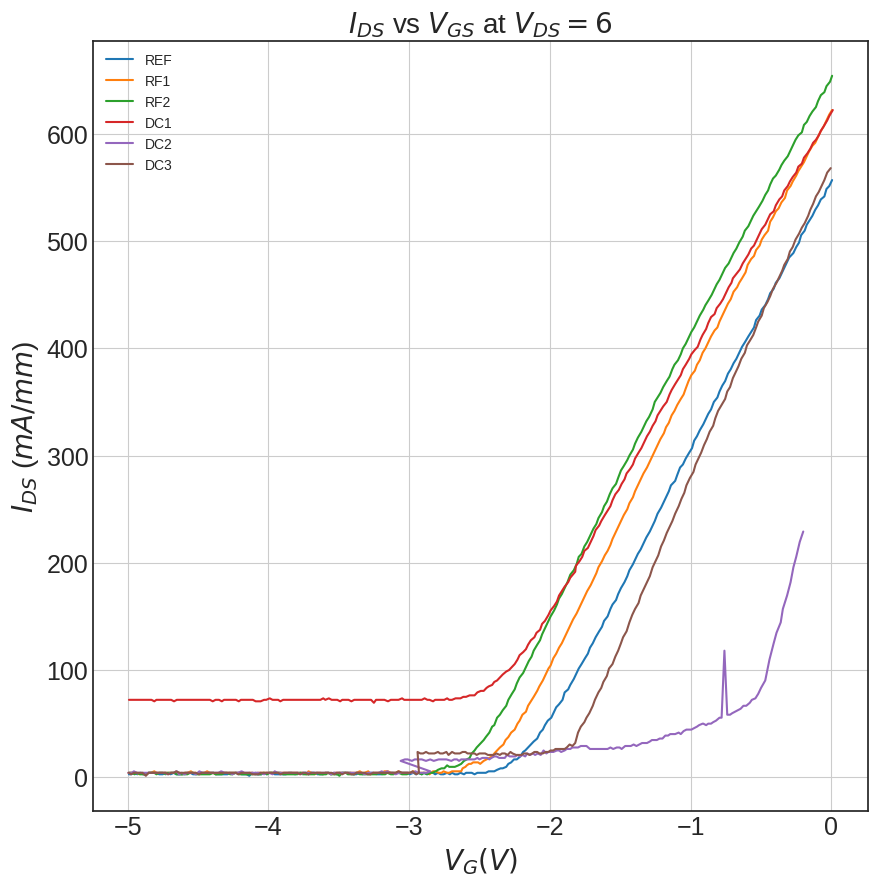

In [53]:
REF_Vgs, REF_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/experimentalREF.csv")
RF1_Vgs, RF1_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/experimentalRF1.csv")
RF2_Vgs, RF2_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/experimentalRF2.csv")
DC1_Vgs, DC1_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/experimentalDC1.csv")
DC2_Vgs, DC2_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/experimentalDC2.csv")
DC3_Vgs, DC3_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/experimentalDC3.csv")
#fieldplate_Vgs, fieldplate_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/fieldplate_Vt.csv")

plt.figure(figsize=[10,10]);
plt.plot(REF_Vgs, 1000*REF_Ids, label="REF");
plt.plot(RF1_Vgs, 1000*RF1_Ids, label="RF1");
plt.plot(RF2_Vgs, 1000*RF2_Ids, label="RF2");
plt.plot(DC1_Vgs, 1000*DC1_Ids, label="DC1");
plt.plot(DC2_Vgs, 1000*DC2_Ids, label="DC2");
plt.plot(DC3_Vgs, 1000*DC3_Ids, label="DC3");
#plt.plot(fieldplate_Vgs, 1000*fieldplate_Ids, label="Field Plate");
#plt.plot(fieldplate_ox_Vgs, 1000*fieldplate_ox_Ids, label="Field Plate with Oxide");
plt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=6$", fontsize=20);
plt.xlabel("$V_{G} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()